<a href="https://colab.research.google.com/github/mohameddhameem/TensorflowCertification/blob/main/Tensorflow_2_x_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 2.x CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT = 0.3
IMG_ROWS, IMG_COLS = 28, 28
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1) # We use only 1 channel
NB_CLASSES = 10

In [2]:
#Lets build the model
def build(input_shape, classes):
  model = models.Sequential()
  # CONV => RELU => POOL
  model.add(layers.Convolution2D(20, (2,2), activation='relu', input_shape = input_shape))
  model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
  # CONV => RELU => POOL
  model.add(layers.Convolution2D(50, (5, 5), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  # Flatten => RELU layers - before going for final classifier flatten it
  model.add(layers.Flatten())
  model.add(layers.Dense(500, activation='relu'))
  # a softmax classifier - final layer
  model.add(layers.Dense(classes, activation="softmax"))
  return model

In [3]:
# Build the data set
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))
#normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

#convert / cast to float 32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
model = build(INPUT_SHAPE, NB_CLASSES)
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER,
              metrics=["accuracy"])
model.summary()

#custom callback
callbacks = [
             tf.keras.callbacks.TensorBoard(log_dir='./logs')
]
history = model.fit(X_train, y_train,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = VERBOSE,
                    validation_split=VALIDATION_SPLIT,
                    callbacks = callbacks)
score = model.evaluate(X_test,y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 20)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 50)          25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dens

# CIFAR Dataset

In [16]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

EPOCHS = 50
NUM_CLASSES = 10

def load_data():
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
 
    # normalize 
    mean = np.mean(x_train,axis=(0,1,2,3))
    std = np.std(x_train,axis=(0,1,2,3))
    x_train = (x_train-mean)/(std+1e-7)
    x_test = (x_test-mean)/(std+1e-7)
 
    y_train =  tf.keras.utils.to_categorical(y_train,NUM_CLASSES)
    y_test =  tf.keras.utils.to_categorical(y_test,NUM_CLASSES)
    return x_train, y_train, x_test, y_test

def build_model():
    model = models.Sequential()
    
    # 1st block
    model.add(layers.Conv2D(32, (3,3), padding='same', 
        input_shape=x_train.shape[1:], activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))
    # 2nd block
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))
    # 3d block 
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.4))
    # dense  
    model.add(layers.Flatten())
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))
    return model

In [17]:
# Then we need to have a part to train the network:
(x_train, y_train, x_test, y_test) = load_data()
model = build_model()
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
# train
batch_size = 64
model.fit(x_train, y_train, batch_size=batch_size,
          epochs=EPOCHS, validation_data=(x_test,y_test)) 
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)       

## Keras image augmentation

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)
datagen.fit(x_train)

In [19]:
batch_size = 64
model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=EPOCHS,
                    verbose=1,validation_data=(x_test,y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
782/782 [==============================] - 27s 33ms/step - loss: 0.9624 - accuracy: 0.6878 - val_loss: 0.6027 - val_accuracy: 0.8008
Epoch 2/50
782/782 [==============================] - 27s 34ms/step - loss: 0.7986 - accuracy: 0.7235 - val_loss: 0.5433 - val_accuracy: 0.8174
Epoch 3/50
782/782 [==============================] - 26s 33ms/step - loss: 0.7652 - accuracy: 0.7360 - val_loss: 0.5695 - val_accuracy: 0.8114
Epoch 4/50
782/782 [==============================] - 27s 34ms/step - loss: 0.7405 - accuracy: 0.7448 - val_loss: 0.5424 - val_accuracy: 0.8185
Epoch 5/50
782/782 [==============================] - 27s 35ms/step - loss: 0.7265 - accuracy: 0.7481 - val_loss: 0.5175 - val_accuracy: 0.8298
Epoch 6/50
782/782 [==============================] - 26s 34ms/step - loss: 0.7070 - accuracy: 0.7561 - val_loss: 0.5898 - val_accuracy: 0.8065
Epoch 7/50
782/782 [==============================] - 26s 34ms/step - loss: 0.6921 - accuracy: 0.7622 - val_loss: 0.4869 - val_accuracy:

In [20]:
# save to disk
model_json = model.to_json()
with open('cifar10_architecture.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('cifar10_weights.h5') 
# test
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

79/79 [==============================] - 0s 6ms/step - loss: 0.5098 - accuracy: 0.8395

Test result: 83.950 loss: 0.510


# Use Pretrained model for prediction

In [1]:
import numpy as np
from skimage.transform import resize
from imageio import imread
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD

In [22]:
dog = 'https://raw.githubusercontent.com/PacktPublishing/Deep-Learning-with-TensorFlow-2-and-Keras/master/Chapter%204/dog.jpg'
cat = 'https://raw.githubusercontent.com/PacktPublishing/Deep-Learning-with-TensorFlow-2-and-Keras/master/Chapter%204/cat-standing.jpg'

In [23]:
# load model
model_architecture = 'cifar10_architecture.json'
model_weights = 'cifar10_weights.h5'
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

In [24]:
# load images
img_names = [cat, dog]
imgs = [resize(imread(img_name), (32, 32)).astype("float32") for img_name in img_names]
imgs = np.array(imgs) / 255
print("imgs.shape:", imgs.shape)

imgs.shape: (2, 32, 32, 3)


In [25]:
# train
optim = SGD()
model.compile(loss='categorical_crossentropy', optimizer=optim,
              metrics=['accuracy'])
# predict 
predictions = model.predict_classes(imgs)
print("predictions:", predictions)

predictions: [8 8]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# tf.keras built-in VGG16 Net

In [2]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np
import cv2
from imageio import imread

In [3]:
# prebuild model with pre-trained weights on imagenet
model = VGG16(weights='imagenet', include_top=True)
model.compile(optimizer='sgd', loss='categorical_crossentropy')

553467904/553467096 [==============================] - 4s 0us/step


In [5]:
IMG_PATH = "https://raw.githubusercontent.com/PacktPublishing/Deep-Learning-with-TensorFlow-2-and-Keras/master/Chapter%204/steam-locomotive.jpg"
# resize into VGG16 trained images' format
im = cv2.resize(imread(IMG_PATH), (224, 224))
im = np.expand_dims(im, axis=0)
im = im.astype(np.float32)

820


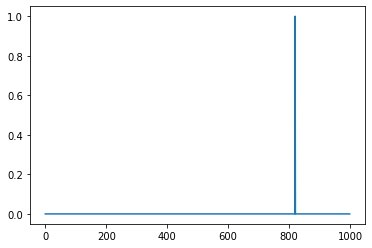

In [6]:
# predict
out = model.predict(im)
index = np.argmax(out)
print(index)
plt.plot(out.ravel())
plt.show()

# Recycling prebuilt deep learning models for extracting features

In [9]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2
# prebuild model with pre-trained weights on imagenet
base_model = VGG16(weights='imagenet', include_top=True)
base_model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7f214b9e1470>>

In [10]:
for i, layer in enumerate(base_model.layers):
    print (i, layer.name, layer.output_shape)

0 input_4 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


In [11]:
# extract features from block4_pool block
model = models.Model(inputs=base_model.input, 
    outputs=base_model.get_layer('block4_pool').output)

In [27]:
img_path = 'https://raw.githubusercontent.com/PacktPublishing/Deep-Learning-with-TensorFlow-2-and-Keras/master/Chapter%204/cat.jpg'
import urllib.request
urllib.request.urlretrieve(img_path, "cat.jpg")
img = image.load_img('cat.jpg', target_size=(224, 224, 3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
# get the features from this block
features = model.predict(x)
print(features)

[[[[  0.         0.        39.127655 ...   0.         0.
      0.      ]
   [  0.         0.         0.       ...   0.       261.40973
      0.      ]
   [  0.         0.         0.       ...   0.       376.41425
      0.      ]
   ...
   [  0.         0.         0.       ...   0.       175.46494
      0.      ]
   [  0.         0.        32.00825  ...   0.         0.
      0.      ]
   [  0.         0.        76.28149  ...   0.         0.
      0.      ]]

  [[  0.         0.         0.       ...   0.        50.92023
      0.      ]
   [  0.         0.        44.452904 ...   0.       123.95452
      0.      ]
   [  0.         0.        27.892153 ...   0.       573.44165
      0.      ]
   ...
   [  0.         0.         0.       ...   0.       683.4282
      0.      ]
   [  0.         0.         0.       ...   0.        18.34751
      0.      ]
   [  0.         0.        60.561913 ...   0.         0.
      0.      ]]

  [[  0.         0.        27.617643 ...   0.         0.
      0.  